In [3]:
# default_exp active_learning

%reload_ext autoreload
%autoreload 2

# Active Learning-少标签数据学习
https://zhuanlan.zhihu.com/p/79764678
## Introduction

主动的学习（Active learning or query learning）作为机器学习的一个分支其主要是针对数据标签较少或打标签“代价”较高这一场景而设计的，在统计学中主动学习又被称为最优实验设计（optimal experimetal design）。

其主要方式是模型通过与用户或专家进行交互，抛出"query"(unlabel data)让专家确定数据的标签，如此反复，以期让模型利用较少的标记数据获得较好“性能”。一般情况下，模型抛出的未标注数据为“hard sample”

    （对于“hard sample”的不同定义可以衍生出一大堆的方法，如可以是ambiguous sample，即模型最难区分的样本；可以是对模型提升（改变）最大的样本，如梯度提升最大；可以是方差减小等等），
    
相比与有监督学习，主动学习通过让模型更多的关注或学习“hard sample”，以期在较少的训练样本下获得较好的模型。如下所示：
![](img/al01.png)
## Scenarios

针对样本选择策略的不同，主动学习一般包括三种learning scenarios，即membership query synthesis、stream-based selective sampling和pool-based sampling：

### Membership Query Synthesis

Membership Query Sysnthesis其query samples可以为任意样本或随机生成（例如对图片样本进行旋转或添加“噪声”等，类似样本增强的策略），然后将其送个Oracle进行判断，其过程如下所示：

由于在样本的随机生成过程中，其有较大的不确定性，因此在某些应用，如NLP中其生成的结果无任何意义，同时专家也无法标记，故这种方法对于某些应用场景有一定的局限性。

### Stream-Based Selective Sampling

Stream-Based Selective Sampling或Sequential active learning，其key assumption为样本的获得是“免费的”或代价较小的，因此learner每次基于某种query strategy选择一个样本给专家进行标记，如下：

### Pool-Based Sampling

Pool-Based Sampling与Stream-Based Sampling最大的区别即为Pool-Based Sampling每次确定一批unlabeled data，由专家标记，如图4。Pool-Based Sampling是active learning中应用最为广泛的一种framework。

## Query Strategy Framework

如上文所述，learner需要根据一定的策略选择unlabeled data，在active learning中其主要包括以下几种：

(1) Uncertainty Sampling

Uncertainty Sampling是最为广泛的一种query strategy（类似hard sample mining），其主要是将模型“最易混淆”或“信息量”最大、最有价值的样本返回给expert，以期获得较大的增益，一般包括：

 (5) Variance Reduction

上述Expected Error Reduction需要判断每个样本对模型的“贡献程度”，其“成本”较高，而Variance Reduction其主要思想是使variance最小的样本，其“价值”最大。对于Variance，bias和noise的介绍可以参考我的这篇笔记

## When Can I Use Active Learning?

希望用尽可能少的标记样本训练模型，同时达到较高的精度；

模型训练的时间成本较高，希望用较少的样本去尽可能的提升模型的性能，这时即可使用active learning strategy去训练模型（“假装”样本标注未知）；

样本数据类别分布不平衡，希望使用downsample的策略去剔除一些样本使样本分布均匀，一般的方式是random removing，采用active learning的主要目的即希望保留尽肯能“有价值”的样本；
## Conclusion

Active Learning与Semi-supervised learning的显著差别即为有无Oracle的参与，但是所用的方法或思想却有较大的重叠（如样本“分歧”最大等），事实上也有一些学者认为active learning即为半监督学习的一种。此外，在序列标记问题中Bootstrapping算法也可以认为是Active Learning，而hard negative mining中也有active learning的思想。总的来说，Active Learning的目的就是希望利用尽可能少的的样本去训练learner以获得较好的performance，而采用的主流方法就是让model去尽可能的关注和学习有“价值”的样本（平衡样本分布的其中之一策略也为此），有关“价值”样本的定义和选择即存在不同的评价指标和方法，进而发展出不同的研究方向，尤其是在垂直细分领域和工业界，Active Learning有较大的应用和研究前景。

# modAL

modAL是Python3的主动学习框架，在设计时考虑了模块化，灵活性和可扩展性。 它建立在scikit-learn之上，它允许您快速创建主动学习工作流程，几乎完全自由。 更重要的是，您可以使用自定义构建的解决方案轻松替换零件，从而轻松设计新颖的算法。

https://modal-python.readthedocs.io/en/latest/

https://github.com/modAL-python/modAL/tree/dev

## install

In [2]:
# ! pip install modAL -U
!pip freeze | grep modAL

modAL==0.3.5


## modAL in a nutshell
https://modal-python.readthedocs.io/en/latest/content/overview/modAL-in-a-nutshell.html

Active learning from bird’s-eye view

With the recent explosion of available data, you have can have millions of unlabelled examples with a high cost to obtain labels. 

For instance, when trying to predict the sentiment of tweets, obtaining a training set can require immense manual labour. But worry not, active learning comes to the rescue! 

In general, AL is a framework allowing you to increase classification performance by intelligently querying you to label the most informative instances. To give an example, suppose that you have the following data and classifier with shaded regions signifying the classification probability.

![](img/modal01.png)
Suppose that you can query the label of an unlabelled instance, but it costs you a lot. Which one would you choose? By querying an instance in the uncertain region, surely you obtain more information than querying by random. Active learning gives you a set of tools to handle problems like this. In general, an active learning workflow looks like the following.

![](img/modal02.png)
The key components of any workflow are the model you choose, the uncertainty measure you use and the query strategy you apply to request labels. With modAL, instead of choosing from a small set of built-in components, you have the freedom to seamlessly integrate scikit-learn or Keras models into your algorithm and easily tailor your custom query strategies and uncertainty measures.

## active learning strategies Currently supported are
### uncertainty-based sampling: least confident (Lewis and Catlett), max margin and max entropy
https://www.sciencedirect.com/science/article/pii/B978155860335650026X?via%3Dihub

Uncertainty sampling methods iteratively request class labels for training instances whose classes are uncertain despite the previous labeled instances. These methods can greatly reduce the number of instances that an expert need label. 

One problem with this approach is that the classifier best suited for an application may be too expensive to train or use during the selection of instances. We test the use of one classifier (a highly efficient probabilistic one) to select examples for training another (the C4.5 rule induction program). 

Despite being chosen by this heterogeneous approach, the uncertainty samples yielded classifiers with lower error rates than random samples ten times larger.

### committee-based algorithms: vote entropy, consensus entropy and max disagreement (Cohn et al.)
Active learning differs from "learning from examples" in that the learning algorithm assumes at least some control over what part of the input domain it receives information about. In some situations, active learning is provably more powerful than learning from examples alone, giving better generalization for a fixed number of training examples. 
 
In this article, we consider the problem of learning a binary concept in the absence of noise. We describe a formalism for active concept learning called selective sampling and show how it may be approximately implemented by a neural network. In selective sampling, a learner receives distribution information from the environment and queries an oracle on parts of the domain it considers "useful." We test our implementation, called an SG-network, on three domains and observe significant improvement in generalization
### others 
    multilabel strategies: SVM binary minimum (Brinker), max loss, mean max loss, (Li et al.) MinConfidence, MeanConfidence, MinScore, MeanScore (Esuli and Sebastiani)
    expected error reduction: binary and log loss (Roy and McCallum)
    Bayesian optimization: probability of improvement, expected improvement and upper confidence bound (Snoek et al.)
    batch active learning: ranked batch-mode sampling (Cardoso et al.)
    information density framework (McCallum and Nigam)
    stream-based sampling (Atlas et al.)
    active regression with max standard deviance sampling for Gaussian processes or ensemble regressors

## modAL in action
https://modal-python.readthedocs.io/en/latest/content/overview/modAL-in-a-nutshell.html

From zero to one in a few lines of code

Active learning with a scikit-learn classifier, for instance RandomForestClassifier, can be as simple as the following.

In [1]:
from modAL.models import ActiveLearner
from sklearn.ensemble import RandomForestClassifier

In [ ]:


# initializing the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_training, y_training=y_training
)

# query for labels
query_idx, query_inst = learner.query(X_pool)

# ...obtaining new labels from the Oracle...

# supply label for queried instance
learner.teach(X_pool[query_idx], y_new)

### Replacing parts quickly

If you would like to use different uncertainty measures and query strategies than the default uncertainty sampling, you can either replace them with several built-in strategies or you can design your own by following a few very simple design principles. 

For instance, replacing the default uncertainty measure to classification entropy looks the following.

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
from sklearn.ensemble import RandomForestClassifier

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_training, y_training=y_training
)

### Replacing parts with your own solutions
modAL was designed to make it easy for you to implement your own query strategy. 

For example, implementing and using a simple random sampling strategy is as easy as the following.

In [ ]:
import numpy as np

def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return query_idx, X_pool[query_idx]

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=random_sampling,
    X_training=X_training, y_training=y_training
)

For more details on how to implement your custom strategies, visit the page Extending modAL!
### An example with active regression

To see modAL in real action, let’s consider an active regression problem with Gaussian processes! In this example, we shall try to learn the noisy sine function:

In [28]:
import numpy as np

X = np.random.choice(np.linspace(0, 20, 10000), size=200, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

In [31]:
import pandas as pd

In [32]:
pd.Series(X.reshape(-1)).sort_values()

43      0.028003
170     0.124012
128     0.228023
16      0.242024
127     0.302030
         ...    
12     19.217922
171    19.237924
79     19.253925
122    19.313931
98     19.825983
Length: 200, dtype: float64

For active learning, we shall define a custom query strategy tailored to Gaussian processes. 

In a nutshell, a query stategy in modAL is a function taking (at least) two arguments (an estimator object and a pool of examples), outputting the index of the queried instance and the instance itself. In our case, the arguments are regressor and X

In [15]:
def GP_regression_std(regressor, X):
    _, std = regressor.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]


After setting up the query strategy and the data, the active learner can be initialized.

In [25]:
from modAL.models import ActiveLearner
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

n_initial = 5
initial_idx = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_training, y_training = X[initial_idx], y[initial_idx]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

regressor = ActiveLearner(
    estimator=GaussianProcessRegressor(kernel=kernel),
    query_strategy=GP_regression_std,
    X_training=X_training.reshape(-1, 1), y_training=y_training.reshape(-1, 1)
)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

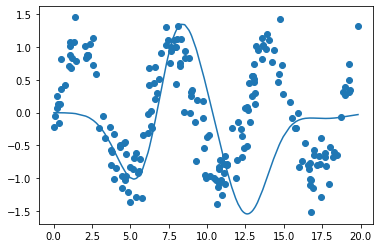

In [33]:
plt.scatter(X, y)
plt.plot(pd.Series(X.reshape(-1)).sort_values(), regressor.predict(pd.Series(X.reshape(-1)).sort_values().values.reshape(-1, 1)))

The blue band enveloping the regressor represents the standard deviation of the Gaussian process at the given point. Now we are ready to do active learning!

In [34]:
# active learning
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = regressor.query(X)
    regressor.teach(X[query_idx].reshape(1, -1), y[query_idx].reshape(1, -1))

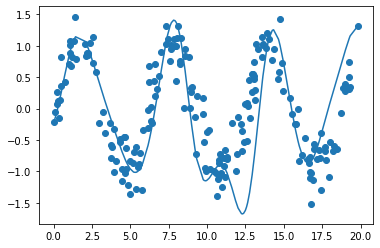

In [35]:
plt.scatter(X, y)
plt.plot(pd.Series(X.reshape(-1)).sort_values(), regressor.predict(pd.Series(X.reshape(-1)).sort_values().values.reshape(-1, 1)))

## api-models

In [2]:
from modAL.models import ActiveLearner

In [ ]:
ActiveLearner(
    estimator: sklearn.base.BaseEstimator,
    query_strategy: Callable = <function uncertainty_sampling at 0x11cb91510>,
    X_training: Union[list, numpy.ndarray, scipy.sparse.csr.csr_matrix, NoneType] = None,
    y_training: Union[list, numpy.ndarray, scipy.sparse.csr.csr_matrix, NoneType] = None,
    bootstrap_init: bool = False,
    **fit_kwargs,
) -> None

### ActiveLearner
https://modal-python.readthedocs.io/en/latest/content/models/ActiveLearner.html

#### Initialization

To create an ActiveLearner object, you need to provide two things: a scikit-learn estimator object and a query strategy function (The latter one is optional, the default strategy is maximum uncertainty sampling.). 

In [3]:
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling
)

#### Training

To teach newly acquired labels for the ActiveLearner, you should use the .teach(X, y) method. This augments the available training data with the new samples X and new labels y, then refits the estimator to this augmented training dataset. Just like this:

In [ ]:
learner.teach(X, y)

#### Querying for labels

Active learners are called active because if you provide them unlabelled samples, they can select you the best instances to label. In modAL, you can achieve this by calling the .query(X) method:

In [ ]:
query_idx, query_sample = learner.query(X)

# ...obtaining new labels from the Oracle...

learner.teach(query_sample, query_label)

#### Prediction and scoring

To use the ActiveLearner for prediction and to calculate the mean accuracy score, you can just do what you would do with a scikit-learn classifier: call the .predict(X) and .score(X, y) methods. If you would like to use more sophisticated metrics for your prediction, feel free to use a function from sklearn.metrics, they are compatible with modAL.


## api Query strategies-modAL.uncertainty
https://modal-python.readthedocs.io/en/latest/content/query_strategies/uncertainty_sampling.html

In modAL, currently there are three built-in query strategies: 
* max uncertainty, 
* max margin and 
* max entropy, 

they are located in the modAL.uncertainty module. You can find an informal tutorial about them at the page Uncertainty-sampling.


### Classification uncertainty
### Classification margin

Classification margin is the difference in probability of the first and second most likely prediction
### Classification entropy

The third built-in uncertainty measure is the classification entropy,

# ALiPy
https://python.ctolib.com/NUAA-AL-ALiPy.html

官网: http://parnec.nuaa.edu.cn/huangsj/alipy/




## install

In [2]:
# !pip install alipy
!pip freeze | grep alipy

alipy==1.2.1


## 用法

有2种使用alipy的方法。 对于高级封装，可以使用`alipy.experiment.AlExperiment`类。 请注意，AlExperiment仅支持最常用的方案-查询实例的所有标签。 此类仅需几行代码即可运行实验。 您所需要做的就是指定各种选项，查询过程将在多线程中运行。 请注意，如果您想使用此类来实现自己的算法，则必须满足一些约束条件，请参见此类的api参考。

In [4]:
from sklearn.datasets import load_iris
from alipy.experiment.al_experiment import AlExperiment

X, y = load_iris(return_X_y=True)

In [7]:
X[:2], y[:2]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]), array([0, 0]))

In [11]:
al = AlExperiment(X, y, stopping_criteria='num_of_queries', stopping_value=50,)
al.split_AL()
al.set_query_strategy(strategy="QueryInstanceUncertainty", measure='least_confident')
al.set_performance_metric('accuracy_score')

In [12]:
al.start_query(multi_thread=True)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         14        |   00:00:00  |       0.649 ± 0.07       |
|   1   |         12        |   00:00:00  |       0.828 ± 0.16       |
|   2   |         11        |   00:00:00  |       0.794 ± 0.07       |
|   3   |         11        |   00:00:00  |       0.741 ± 0.09       |
|   4   |         10        |   00:00:00  |       0.733 ± 0.00       |
|   5   |         10        |   00:00:00  |       0.509 ± 0.15       |
|   6   |         9         |   00:00:00  |       0.840 ± 0.10       |
|   7   |         9         |   00:00:00  |       0.760 ± 0.10       |
|   8   |         8         |   00:00:00  |       0.811 ± 0.08       |
|   9   |         8         |   00:00:00  |       0.881 ± 0.05       |
+-------+-------------------+-------------+--------------------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         23        |   00:00:01  |       0.726 ± 0.13       |
|   1   |         21        |   00:00:01  |       0.862 ± 0.14       |
|   2   |         19        |   00:00:01  |       0.764 ± 0.07       |
|   3   |         19        |   00:00:01  |       0.796 ± 0.10       |
|   4   |         19        |   00:00:01  |       0.818 ± 0.10       |
|   5   |         20        |   00:00:01  |       0.580 ± 0.16       |
|   6   |         18        |   00:00:01  |       0.846 ± 0.09       |
|   7   |         17        |   00:00:01  |       0.804 ± 0.09       |
|   8   |         18        |   00:00:01  |       0.726 ± 0.13       |
|   9   |         16        |   00:00:01  |       0.856 ± 0.08       |
+-------+-------------------+-------------+--------------------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         33        |   00:00:02  |       0.792 ± 0.15       |
|   1   |         32        |   00:00:02  |       0.803 ± 0.15       |
|   2   |         29        |   00:00:02  |       0.765 ± 0.07       |
|   3   |         29        |   00:00:02  |       0.825 ± 0.09       |
|   4   |         30        |   00:00:02  |       0.855 ± 0.10       |
|   5   |         31        |   00:00:02  |       0.629 ± 0.17       |
|   6   |         27        |   00:00:02  |       0.868 ± 0.08       |
|   7   |         27        |   00:00:02  |       0.728 ± 0.13       |
|   8   |         28        |   00:00:02  |       0.782 ± 0.13       |
|   9   |         27        |   00:00:02  |       0.896 ± 0.08       |
+-------+-------------------+-------------+--------------------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         41        |   00:00:03  |       0.804 ± 0.14       |
|   1   |         40        |   00:00:03  |       0.812 ± 0.15       |
|   2   |         39        |   00:00:03  |       0.778 ± 0.06       |
|   3   |         38        |   00:00:03  |       0.841 ± 0.08       |
|   4   |         38        |   00:00:03  |       0.863 ± 0.09       |
|   5   |         41        |   00:00:03  |       0.702 ± 0.20       |
|   6   |         37        |   00:00:03  |       0.865 ± 0.08       |
|   7   |         37        |   00:00:03  |       0.760 ± 0.14       |
|   8   |         38        |   00:00:03  |       0.802 ± 0.12       |
|   9   |         38        |   00:00:03  |       0.912 ± 0.08       |
+-------+-------------------+-------------+--------------------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         50        |   00:00:04  |       0.805 ± 0.12       |
|   1   |         49        |   00:00:04  |       0.842 ± 0.15       |
|   2   |         50        |   00:00:04  |       0.787 ± 0.06       |
|   3   |         47        |   00:00:04  |       0.845 ± 0.08       |
|   4   |         47        |   00:00:04  |       0.870 ± 0.08       |
|   5   |         50        |   00:00:04  |       0.745 ± 0.20       |
|   6   |         46        |   00:00:04  |       0.879 ± 0.08       |
|   7   |         45        |   00:00:04  |       0.788 ± 0.14       |
|   8   |         46        |   00:00:04  |       0.812 ± 0.11       |
|   9   |         45        |   00:00:04  |       0.918 ± 0.07       |
+-------+-------------------+-------------+--------------------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         50        |   00:00:05  |       0.805 ± 0.12       |
|   1   |         50        |   00:00:05  |       0.845 ± 0.15       |
|   2   |         50        |   00:00:05  |       0.787 ± 0.06       |
|   3   |         50        |   00:00:05  |       0.845 ± 0.07       |
|   4   |         50        |   00:00:05  |       0.873 ± 0.08       |
|   5   |         50        |   00:00:04  |       0.745 ± 0.20       |
|   6   |         50        |   00:00:04  |       0.884 ± 0.08       |
|   7   |         50        |   00:00:04  |       0.801 ± 0.14       |
|   8   |         50        |   00:00:04  |       0.815 ± 0.11       |
|   9   |         50        |   00:00:04  |       0.918 ± 0.07       |
+-------+-------------------+-------------+--------------------------+


In [13]:
%matplotlib inline


+--------------------------+-------------------+---------------------------+--------------+------------+
|         Methods          | number_of_queries | number_of_different_split | performance  | batch_size |
+--------------------------+-------------------+---------------------------+--------------+------------+
| QueryInstanceUncertainty |         50        |             10            | 0.829 ± 0.05 |     1      |
+--------------------------+-------------------+---------------------------+--------------+------------+


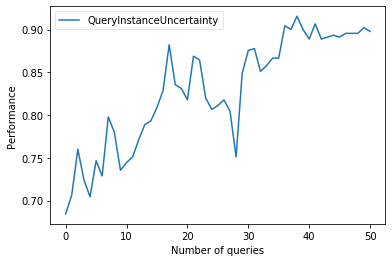

In [14]:
al.plot_learning_curve()

要自定义自己的主动学习实验，建议遵循ALiPy /示例和教程（位于alipy主页中）中提供的示例，并根据使用情况选择工具。 这样，一方面，您的程序逻辑对您来说是绝对清楚的，因此易于调试。 另一方面，您的主动学习过程中的某些部分可以由您自己的实现方式代替以用于特殊用途。


| round | initially labeled data | number of queries | cost | Performance: |
|   0   |    10 (9.52% of all)   |         9         |  0   | 0.901 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   0   |    10 (9.52% of all)   |         19        |  0   | 0.923 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   0   |    10 (9.52% of all)   |         28        |  0   | 0.936 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   0   |    10 (9.52% of all)   |         38        |  0   | 0.945 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   0   |    10 (9.52% of all)   |         47        |  0   | 0.951 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   0   |    10 (9.52% of all)   |         50        |  0   | 0.953 ± 0.04 |
| round | initially labeled data | number of queries | cost | Performance: |
|   1   |    10 (9.52% of all)   |         5         |  0   | 0.844 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   1   |    10 (9.52% of all)   |         14        |  0   | 0.898 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   1   |    10 (9.52% of all)   |         24        |  0   | 0.920 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   1   |    10 (9.52% of all)   |         34        |  0   | 0.935 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   1   |    10 (9.52% of all)   |         44        |  0   | 0.943 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   1   |    10 (9.52% of all)   |         50        |  0   | 0.945 ± 0.05 |
| round | initially labeled data | number of queries | cost | Performance: |
|   2   |    10 (9.52% of all)   |         2         |  0   | 0.756 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         10        |  0   | 0.858 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         19        |  0   | 0.901 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         27        |  0   | 0.915 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         35        |  0   | 0.922 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         44        |  0   | 0.929 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   2   |    10 (9.52% of all)   |         50        |  0   | 0.932 ± 0.05 |
| round | initially labeled data | number of queries | cost | Performance: |
|   3   |    10 (9.52% of all)   |         3         |  0   | 0.711 ± 0.00 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         13        |  0   | 0.850 ± 0.11 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         23        |  0   | 0.912 ± 0.11 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         32        |  0   | 0.928 ± 0.10 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         40        |  0   | 0.934 ± 0.09 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         48        |  0   | 0.943 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   3   |    10 (9.52% of all)   |         50        |  0   | 0.945 ± 0.08 |
| round | initially labeled data | number of queries | cost | Performance: |
|   4   |    10 (9.52% of all)   |         8         |  0   | 0.803 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   4   |    10 (9.52% of all)   |         18        |  0   | 0.864 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   4   |    10 (9.52% of all)   |         27        |  0   | 0.883 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   4   |    10 (9.52% of all)   |         37        |  0   | 0.897 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   4   |    10 (9.52% of all)   |         46        |  0   | 0.904 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   4   |    10 (9.52% of all)   |         50        |  0   | 0.907 ± 0.05 |
| round | initially labeled data | number of queries | cost | Performance: |
|   5   |    10 (9.52% of all)   |         6         |  0   | 0.848 ± 0.11 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         15        |  0   | 0.874 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         23        |  0   | 0.900 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         31        |  0   | 0.919 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         39        |  0   | 0.929 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         47        |  0   | 0.930 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   5   |    10 (9.52% of all)   |         50        |  0   | 0.930 ± 0.06 |
| round | initially labeled data | number of queries | cost | Performance: |
|   6   |    10 (9.52% of all)   |         7         |  0   | 0.806 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   6   |    10 (9.52% of all)   |         16        |  0   | 0.874 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   6   |    10 (9.52% of all)   |         26        |  0   | 0.917 ± 0.09 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   6   |    10 (9.52% of all)   |         35        |  0   | 0.938 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   6   |    10 (9.52% of all)   |         45        |  0   | 0.949 ± 0.08 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   6   |    10 (9.52% of all)   |         50        |  0   | 0.952 ± 0.07 |
| round | initially labeled data | number of queries | cost | Performance: |
|   7   |    10 (9.52% of all)   |         5         |  0   | 0.916 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   7   |    10 (9.52% of all)   |         15        |  0   | 0.948 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   7   |    10 (9.52% of all)   |         25        |  0   | 0.959 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   7   |    10 (9.52% of all)   |         35        |  0   | 0.964 ± 0.03 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   7   |    10 (9.52% of all)   |         45        |  0   | 0.966 ± 0.03 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   7   |    10 (9.52% of all)   |         50        |  0   | 0.967 ± 0.03 |
| round | initially labeled data | number of queries | cost | Performance: |
|   8   |    10 (9.52% of all)   |         5         |  0   | 0.840 ± 0.07 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         15        |  0   | 0.884 ± 0.06 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         25        |  0   | 0.902 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         34        |  0   | 0.910 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         42        |  0   | 0.915 ± 0.05 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         49        |  0   | 0.918 ± 0.04 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   8   |    10 (9.52% of all)   |         50        |  0   | 0.918 ± 0.04 |
| round | initially labeled data | number of queries | cost | Performance: |
|   9   |    10 (9.52% of all)   |         7         |  0   | 0.914 ± 0.02 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         15        |  0   | 0.926 ± 0.03 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         23        |  0   | 0.937 ± 0.03 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         32        |  0   | 0.941 ± 0.03 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         40        |  0   | 0.944 ± 0.02 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         48        |  0   | 0.944 ± 0.02 |

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",

|   9   |    10 (9.52% of all)   |         50        |  0   | 0.943 ± 0.02 |
+---------+-------------------+---------------------------+--------------+------------+
| Methods | number_of_queries | number_of_different_split | performance  | batch_size |
+---------+-------------------+---------------------------+--------------+------------+
|   QBC   |         50        |             10            | 0.939 ± 0.02 |     1      |
+---------+-------------------+---------------------------+--------------+------------+


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


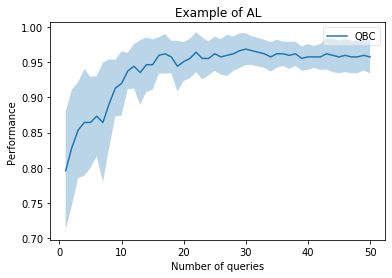

In [15]:
#export
import copy
from sklearn.datasets import load_iris
from alipy import ToolBox

X, y = load_iris(return_X_y=True)
alibox = ToolBox(X=X, y=y, query_type='AllLabels', saving_path='.')

# Split data
alibox.split_AL(test_ratio=0.3, initial_label_rate=0.1, split_count=10)

# Use the default Logistic Regression classifier
model = alibox.get_default_model()

# The cost budget is 50 times querying
stopping_criterion = alibox.get_stopping_criterion('num_of_queries', 50)

# Use pre-defined strategy
QBCStrategy = alibox.get_query_strategy(strategy_name='QueryInstanceQBC')
QBC_result = []

for round in range(10):
    # Get the data split of one fold experiment
    train_idx, test_idx, label_ind, unlab_ind = alibox.get_split(round)
    # Get intermediate results saver for one fold experiment
    saver = alibox.get_stateio(round)

    while not stopping_criterion.is_stop():
        # Select a subset of Uind according to the query strategy
        # Passing model=None to use the default model for evaluating the committees' disagreement
        select_ind = QBCStrategy.select(label_ind, unlab_ind, model=None, batch_size=1)
        label_ind.update(select_ind)
        unlab_ind.difference_update(select_ind)

        # Update model and calc performance according to the model you are using
        model.fit(X=X[label_ind.index, :], y=y[label_ind.index])
        pred = model.predict(X[test_idx, :])
        accuracy = alibox.calc_performance_metric(y_true=y[test_idx],
                                                  y_pred=pred,
                                                  performance_metric='accuracy_score')

        # Save intermediate results to file
        st = alibox.State(select_index=select_ind, performance=accuracy)
        saver.add_state(st)
        saver.save()

        # Passing the current progress to stopping criterion object
        stopping_criterion.update_information(saver)
    # Reset the progress in stopping criterion object
    stopping_criterion.reset()
    QBC_result.append(copy.deepcopy(saver))

analyser = alibox.get_experiment_analyser(x_axis='num_of_queries')
analyser.add_method(method_name='QBC', method_results=QBC_result)
print(analyser)
analyser.plot_learning_curves(title='Example of AL', std_area=True)

# nb_export

In [4]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted engineering_nbdev.ipynb.
Converted index.ipynb.


In [7]:
!nbdev_build_docs

No notebooks were modified
converting /Users/luoyonggui/PycharmProjects/nbdevlib/index.ipynb to README.md
